   # Diabetes Prediction

Changing the working directory

In [2563]:
import os

In [2564]:
os.chdir("F:\Avantika University\Semester 6\AI\Assignment 2")

In [2565]:
os.getcwd()

'F:\\Avantika University\\Semester 6\\AI\\Assignment 2'

Importing the Libraries

In [2566]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


In [2567]:
from numpy.random import seed
seed(3)
import tensorflow as tf
tf.random.set_seed(1)

Loading the Dataset

In [2568]:
data = pd.read_csv("diabetes.csv")

In [2569]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2570]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [2571]:
data.shape

(768, 9)

In [2572]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2573]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2574]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

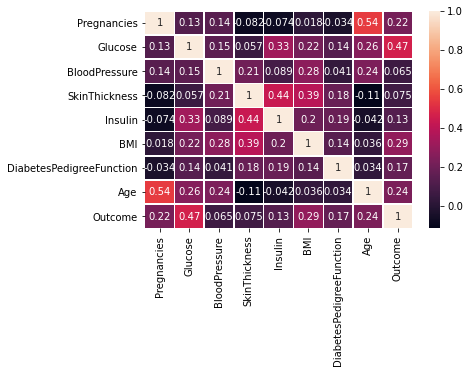

In [2575]:
sn.heatmap(data.corr(), annot=True, linewidths=.5)

In [2576]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2577]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [2578]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [2579]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Visulization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

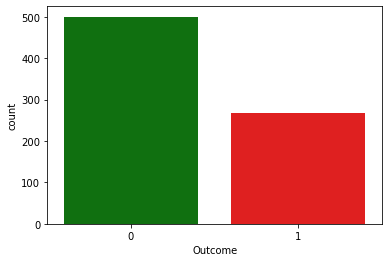

In [2580]:
## count plot for target veriable
sn.countplot(data['Outcome'], palette=['green', 'red'])

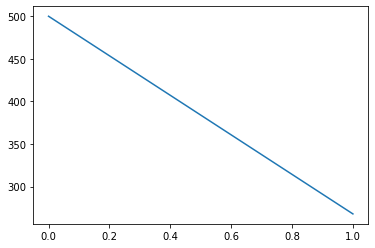

In [2581]:
plt.plot(data['Outcome'].value_counts())

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

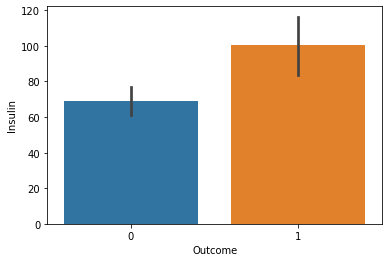

In [2582]:
sn.barplot( data['Outcome'], data['Insulin'])

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

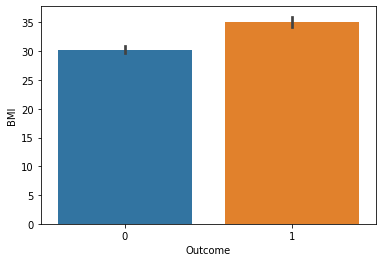

In [2583]:
sn.barplot( data['Outcome'], data['BMI'])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

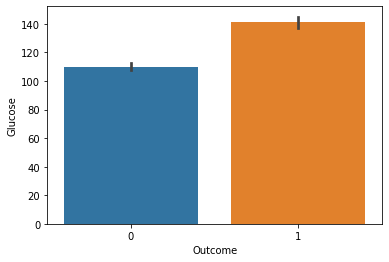

In [2584]:
sn.barplot( data['Outcome'], data['Glucose'])

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

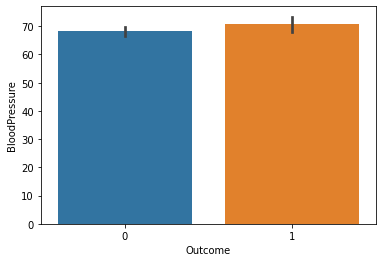

In [2585]:
sn.barplot( data['Outcome'], data['BloodPressure'])

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

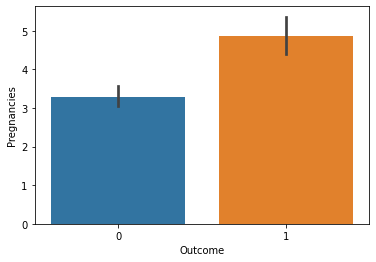

In [2586]:
sn.barplot( data['Outcome'], data['Pregnancies'])

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

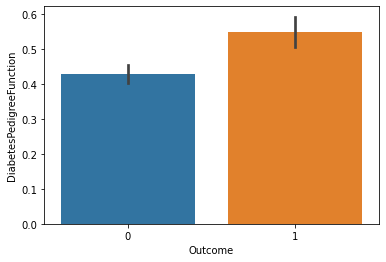

In [2587]:
sn.barplot( data['Outcome'], data['DiabetesPedigreeFunction'])

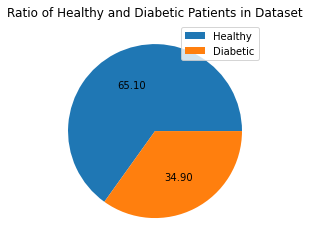

In [2588]:
plt.title('Ratio of Healthy and Diabetic Patients in Dataset')
plt.pie(data['Outcome'].value_counts(),autopct='%.2f')
plt.legend(['Healthy','Diabetic'],)
plt.show()


In [2589]:
def plot(s):
    sn.kdeplot(data.loc[ data.Outcome == 0, s] )
    sn.kdeplot(data.loc[ data.Outcome == 1, s] )    
    plt.legend(['Healthy','Diabetic'])
    plt.ylabel('Number of Patients')
    plt.yticks([])
    plt.show()

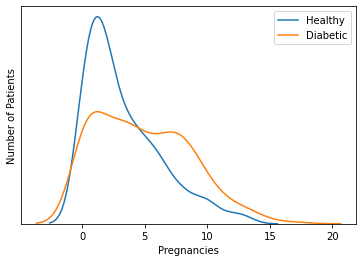

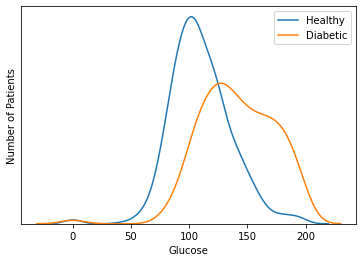

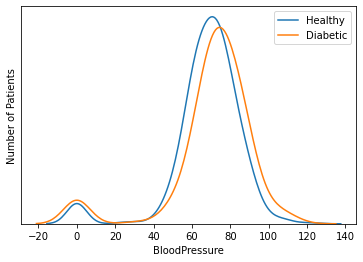

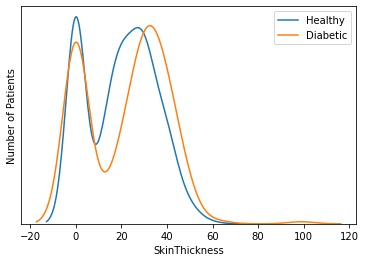

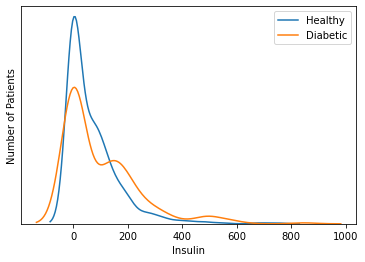

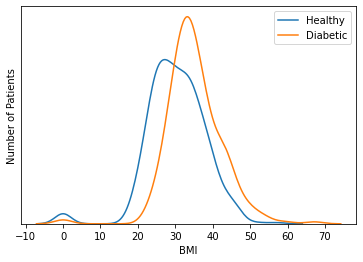

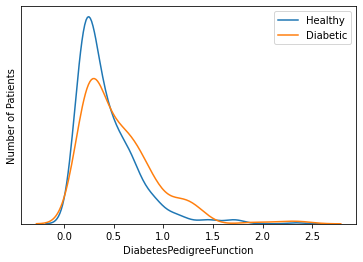

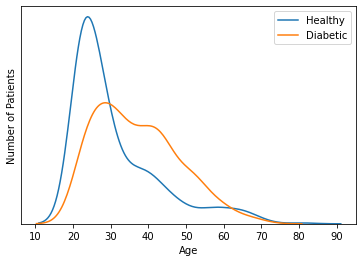

In [2590]:
for i in data.columns[:-1]:
    plot(i)

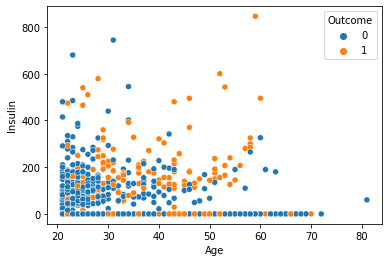

In [2591]:
sn.scatterplot(x='Age', y='Insulin', data=data, hue='Outcome')
plt.show()

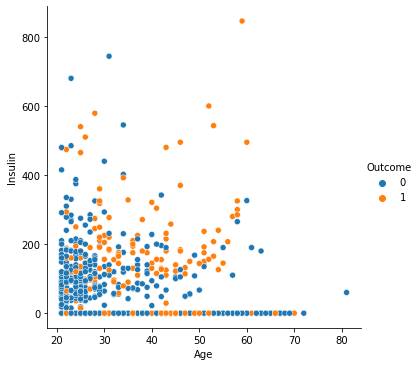

In [2592]:
sn.relplot(x='Age', y='Insulin', data=data, hue='Outcome', kind='scatter')
plt.show()

In [2593]:
column_names = data.columns
column_names = column_names.drop('Outcome')
for name in column_names:
    print('{}\n'.format(name))
    print(data.groupby(['Outcome'])[name].mean())
    print()

Pregnancies

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64

Glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

BloodPressure

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

SkinThickness

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64

Insulin

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

BMI

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

DiabetesPedigreeFunction

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

Age

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64



In the dataset, people diagnosed with diabetes had higher values for every attribute (mean value).

# Data Preprocessing

In [2594]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [2595]:
data['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

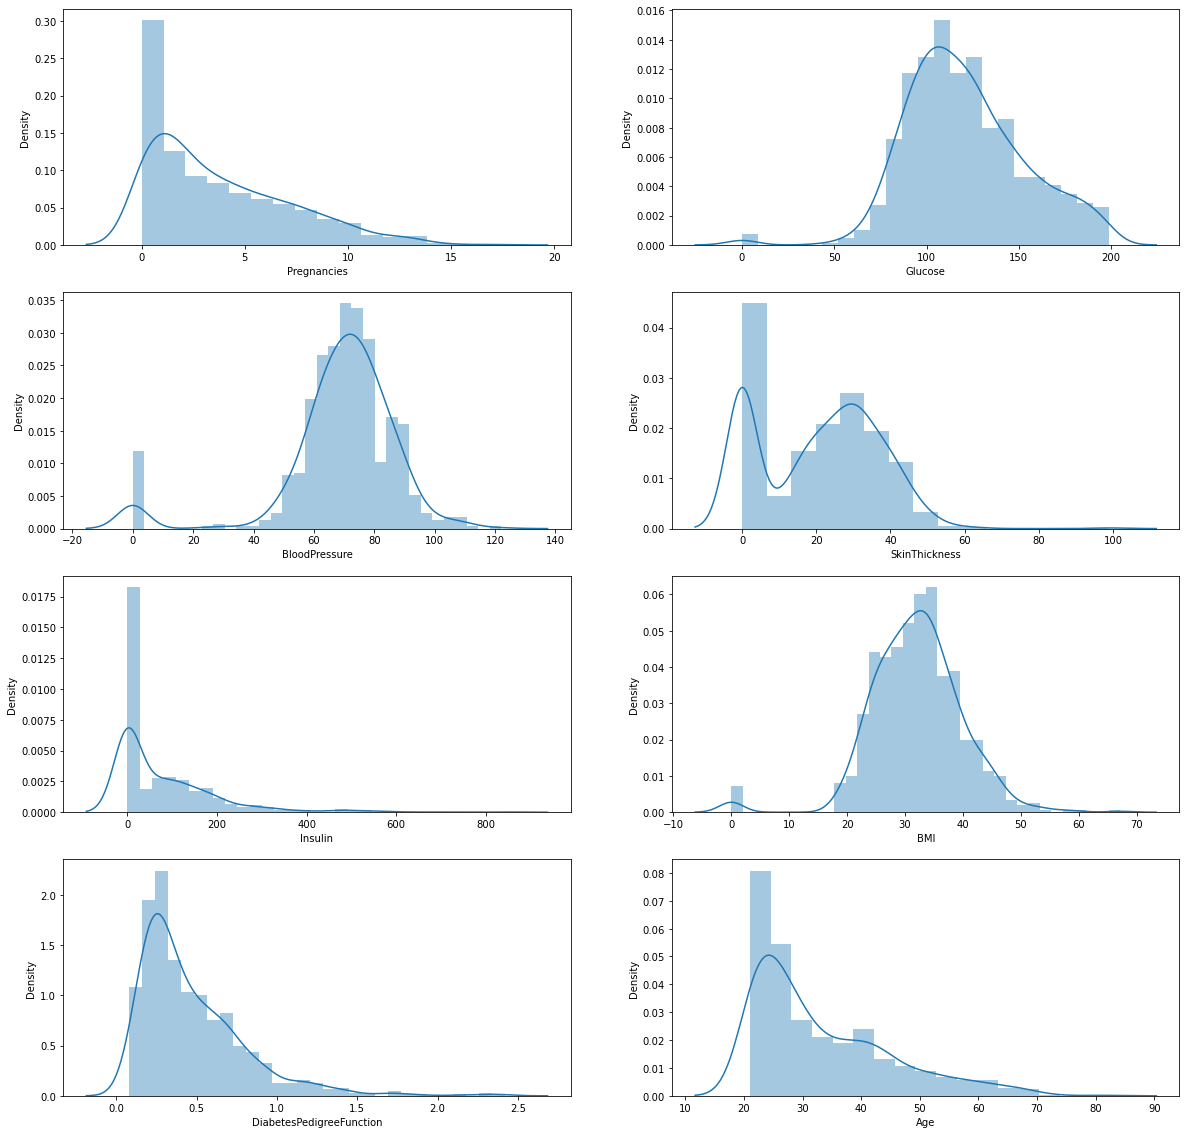

In [2596]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sn.distplot(data.Pregnancies, ax=axes[0,0])
sn.distplot(data.Glucose, ax=axes[0,1])
sn.distplot(data.BloodPressure, ax=axes[1,0])
sn.distplot(data.SkinThickness, ax=axes[1,1])
sn.distplot(data.Insulin, ax=axes[2,0])
sn.distplot(data.BMI, ax=axes[2,1])
sn.distplot(data.DiabetesPedigreeFunction, ax=axes[3,0])
sn.distplot(data.Age, ax=axes[3,1])


Although there arent any null value associated with the dataset but Skin Thickness, Insulin, Blood Pressure, Glucose and BMI has some of the data encoded as 0s.

0's needs to be replaced.

Using the median value associated with that particular column, we will replace the 0's.

In [2597]:
data.SkinThickness.replace(0, data.SkinThickness.median(), inplace=True)
data.Insulin.replace(0, data.Insulin.median(), inplace=True)
data.Glucose.replace(0, data.Glucose.median(), inplace=True)
data.BloodPressure.replace(0, data.BloodPressure.median(), inplace=True)
data.BMI.replace(0, data.BMI.median(), inplace=True)

In [2598]:
data["Insulin"]

0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
       ...  
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64

Here, 0's are being replaced by the median value which is 30.5

<AxesSubplot:xlabel='Age', ylabel='Density'>

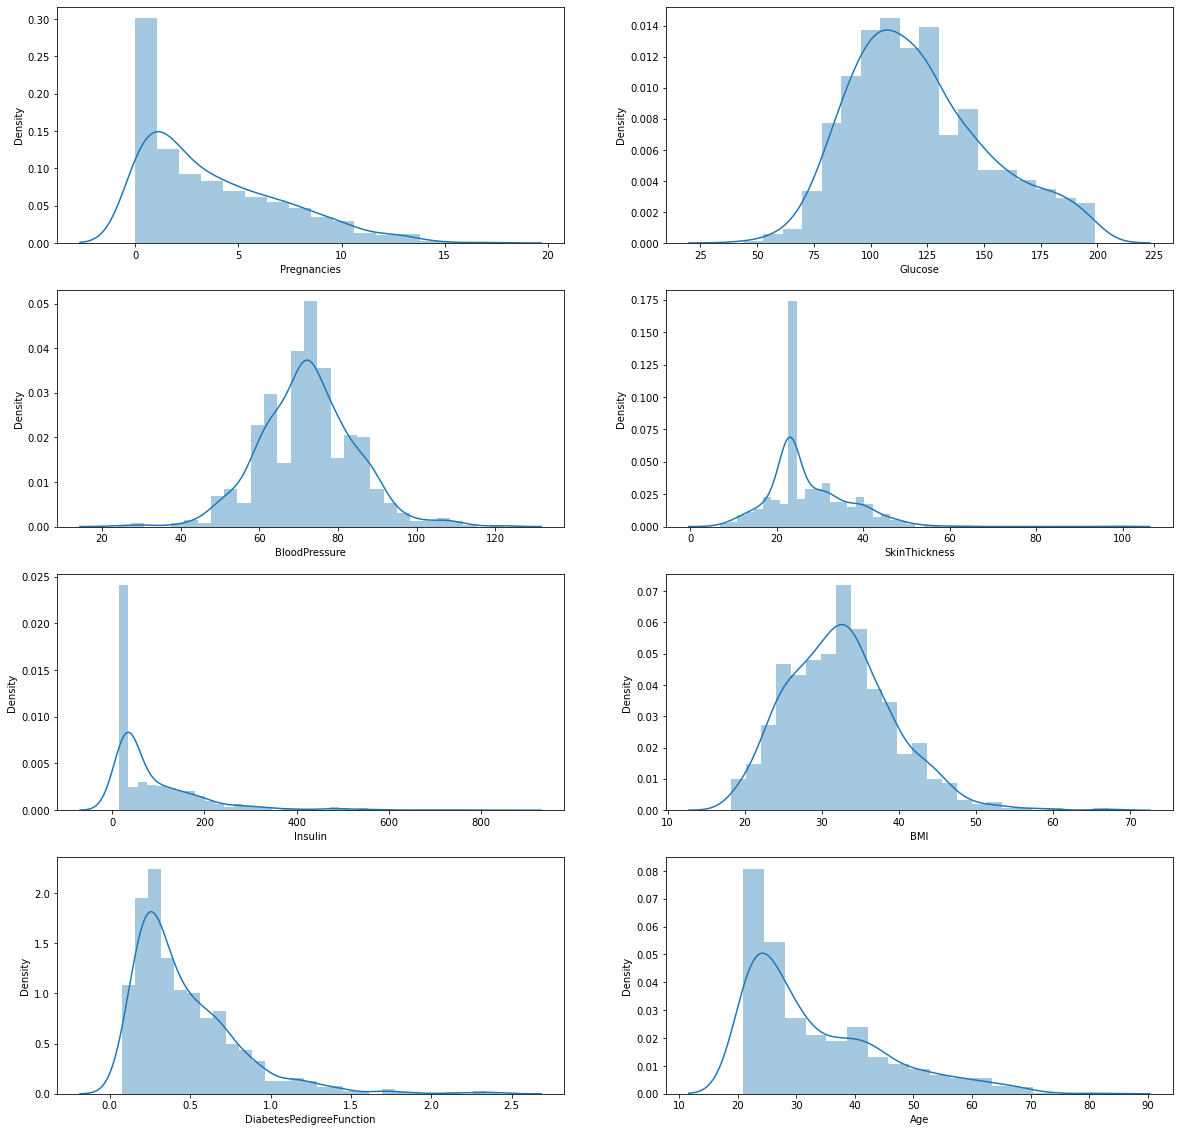

In [2599]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sn.distplot(data.Pregnancies, ax=axes[0,0])
sn.distplot(data.Glucose, ax=axes[0,1])
sn.distplot(data.BloodPressure, ax=axes[1,0])
sn.distplot(data.SkinThickness, ax=axes[1,1])
sn.distplot(data.Insulin, ax=axes[2,0])
sn.distplot(data.BMI, ax=axes[2,1])
sn.distplot(data.DiabetesPedigreeFunction, ax=axes[3,0])
sn.distplot(data.Age, ax=axes[3,1])

# Neural Network

# Preparation of the data

In [2600]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,callbacks
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing,model_selection

Split the data into a training set and test set.
And Normalization the data

In [2601]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [2602]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [2603]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [2604]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [2605]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(537, 8) (537,) (231, 8) (231,)


In [2606]:
Early_Stopping=callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True,)

In [2607]:
model=keras.Sequential([
    layers.Dense(14,activation='relu',input_shape=[8]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(8,activation='relu'),
    layers.Dense(1),])

In [2608]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 14)                126       
_________________________________________________________________
dropout_40 (Dropout)         (None, 14)                0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 14)                56        
_________________________________________________________________
dense_121 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 9         
Total params: 311
Trainable params: 283
Non-trainable params: 28
_________________________________________________________________


# Comilping and Fitting the Model

In [2609]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer='adam')

Defining the callbacks

In [2610]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [2611]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=256,epochs=200,callbacks=[Early_Stopping],verbose=0)

In [2612]:
history_df=pd.DataFrame(history.history)

In [2613]:
print(type(history_df))

<class 'pandas.core.frame.DataFrame'>


In [2614]:
history_df.describe()

,loss,val_loss
count,47.000000,47.000000
mean,2.002026,1.519061
std,0.545746,1.829681
min,1.323242,0.828107
25%,1.577209,0.832567
50%,1.953879,0.879334
75%,2.396481,1.003496
max,3.499551,9.843066


In [2615]:
history_df.columns

Index(['loss', 'val_loss'], dtype='object')

In [2616]:
history_df['loss']

0     3.499551
1     3.250565
2     2.894092
3     2.743461
4     2.827684
5     2.840484
6     2.703663
7     2.548119
8     2.553410
9     2.634005
10    2.392293
11    2.451334
12    2.224350
13    2.400670
14    2.068337
15    1.997655
16    1.983147
17    2.043193
18    2.037211
19    2.073597
20    2.135118
21    1.897031
22    1.696692
23    1.973779
24    1.595258
25    2.085619
26    1.734563
27    1.953879
28    1.651900
29    1.701190
30    1.738392
31    1.627147
32    1.565383
33    1.640490
34    1.640299
35    1.520793
36    1.457709
37    1.478276
38    1.335709
39    1.431493
40    1.373812
41    1.589034
42    1.368061
43    1.498392
44    1.389835
45    1.323242
46    1.525311
Name: loss, dtype: float64

In [2617]:
history_df['loss'].min()

1.3232417106628418

<AxesSubplot:>

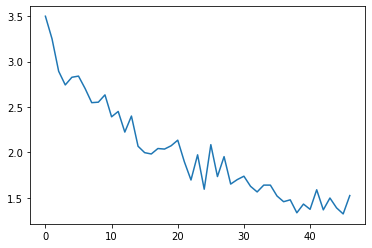

In [2618]:
history_df.loc[:,'loss'].plot()

In [2619]:
y_test.describe()

count    231.000000
mean       0.329004
std        0.470872
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [2620]:
y_test.max()

1

In [2621]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [2622]:
accuracy=model.evaluate(x,y)

24/24 [==============================] - 0s 2ms/step - loss: 0.9434


In [2623]:
print(accuracy*100)

94.3443238735199


In [2624]:
y_test

158    0
251    0
631    0
757    1
689    1
      ..
225    0
387    1
120    1
7      0
729    0
Name: Outcome, Length: 231, dtype: int64

In [2625]:
y_train

501    0
371    0
634    0
221    1
12     0
      ..
534    0
584    1
493    1
527    0
168    0
Name: Outcome, Length: 537, dtype: int64

In [2626]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [2627]:
predictions=model.predict_classes(x)

In [2628]:
data['predictions'] = predictions 

In [2629]:
data['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [2630]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,predictions
0,6,148,72,35,30.5,33.6,0.627,50,1,1
1,1,85,66,29,30.5,26.6,0.351,31,0,0
2,8,183,64,23,30.5,23.3,0.672,32,1,1
3,1,89,66,23,94.0,28.1,0.167,21,0,0
4,0,137,40,35,168.0,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0,0
764,2,122,70,27,30.5,36.8,0.340,27,0,0
765,5,121,72,23,112.0,26.2,0.245,30,0,1
766,1,126,60,23,30.5,30.1,0.349,47,1,1


In [2631]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,predictions
763,10,101,76,48,180.0,32.9,0.171,63,0,0
764,2,122,70,27,30.5,36.8,0.340,27,0,0
765,5,121,72,23,112.0,26.2,0.245,30,0,1
766,1,126,60,23,30.5,30.1,0.349,47,1,1
767,1,93,70,31,30.5,30.4,0.315,23,0,0


In [2632]:
predictions_list = data['predictions'].tolist()

In [2633]:
Outcome_list = data['Outcome'].tolist()

In [2634]:
print(data[['Outcome', 'predictions']])

     Outcome  predictions
0          1            1
1          0            0
2          1            1
3          0            0
4          1            0
..       ...          ...
763        0            0
764        0            0
765        0            1
766        1            1
767        0            0

[768 rows x 2 columns]


In [2635]:
for x, y in zip(predictions_list, Outcome_list):
    print(x, y, sep='\t\t')

1		1
0		0
1		1
0		0
0		1
0		0
0		1
0		0
0		1
0		1
0		0
1		1
0		0
0		1
1		1
0		1
0		1
0		1
0		0
1		1
0		0
0		0
1		1
0		1
1		1
1		1
1		1
0		0
1		0
0		0
0		0
0		1
0		0
0		0
0		0
0		0
0		0
0		1
0		1
0		1
1		0
0		0
0		0
1		1
1		0
1		1
1		0
0		0
0		1
0		0
0		0
0		0
0		0
0		1
0		0
0		0
0		1
0		0
1		0
0		0
0		0
0		1
0		0
1		0
0		1
0		0
0		1
0		0
0		0
1		0
0		1
1		0
0		1
0		0
0		0
0		0
0		0
0		0
0		1
0		0
0		0
0		0
0		0
0		0
0		1
0		0
0		0
0		0
1		1
0		0
0		0
0		0
0		0
1		1
1		0
0		0
0		0
0		0
0		0
0		1
1		1
1		0
0		0
0		0
0		0
1		0
0		0
1		0
0		0
0		1
1		1
0		1
0		0
0		0
1		1
1		1
0		1
0		0
0		0
0		0
1		1
0		0
0		0
0		0
0		1
0		1
1		0
0		0
0		1
0		1
1		1
0		1
1		1
0		0
0		0
1		0
0		0
0		0
0		0
0		0
0		0
0		0
0		0
0		1
0		0
0		0
0		0
0		0
1		0
0		0
1		0
0		0
1		1
0		0
1		1
1		1
0		0
0		0
0		0
1		1
1		0
0		0
0		0
0		0
0		1
0		1
1		0
0		0
0		0
0		0
0		1
1		1
0		0
0		0
0		0
1		1
0		0
1		1
1		0
0		1
0		0
1		0
0		0
0		0
1		0
1		1
0		1
0		1
0		1
1		1
0		0
1		0
1		1
0		1
0		0
1		1
0		0
0		1
0		1
0		1
